In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

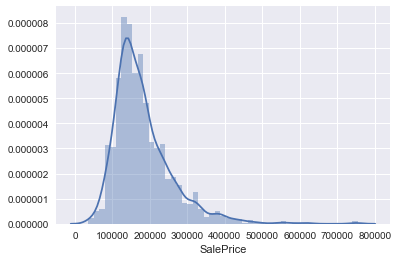

In [16]:
#Sales Price Distribution
sns.distplot(df.SalePrice)

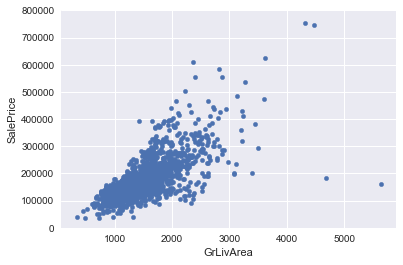

In [21]:
#Relationship between SlaePrice and Above grade (ground) living area square feet

var = 'GrLivArea'
data = pd.concat([df.SalePrice, df.GrLivArea], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [25]:
data.GrLivArea.isnull().values.any()

False

In [ ]:
#Overall Quality

In [27]:
df.OverallQual.isnull().values.any()

False

(-0.5, 9.5, 0, 800000)

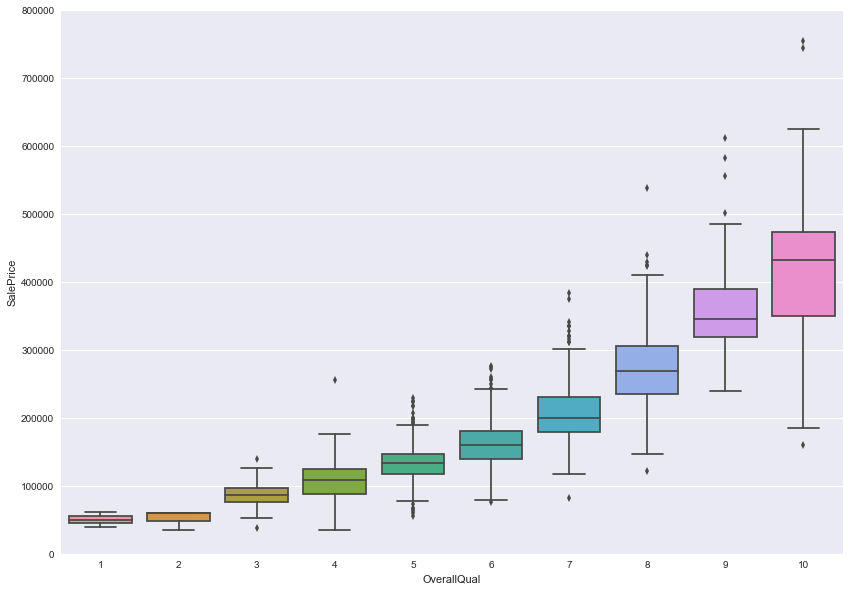

In [34]:
var = 'OverallQual'
data = pd.concat([df.SalePrice, df.OverallQual], axis=1)
f, ax = plt.subplots(figsize=(14,10))
fig = sns.boxplot(x=var, y="SalePrice", data = data)
fig.axis(ymin=0, ymax=800000)

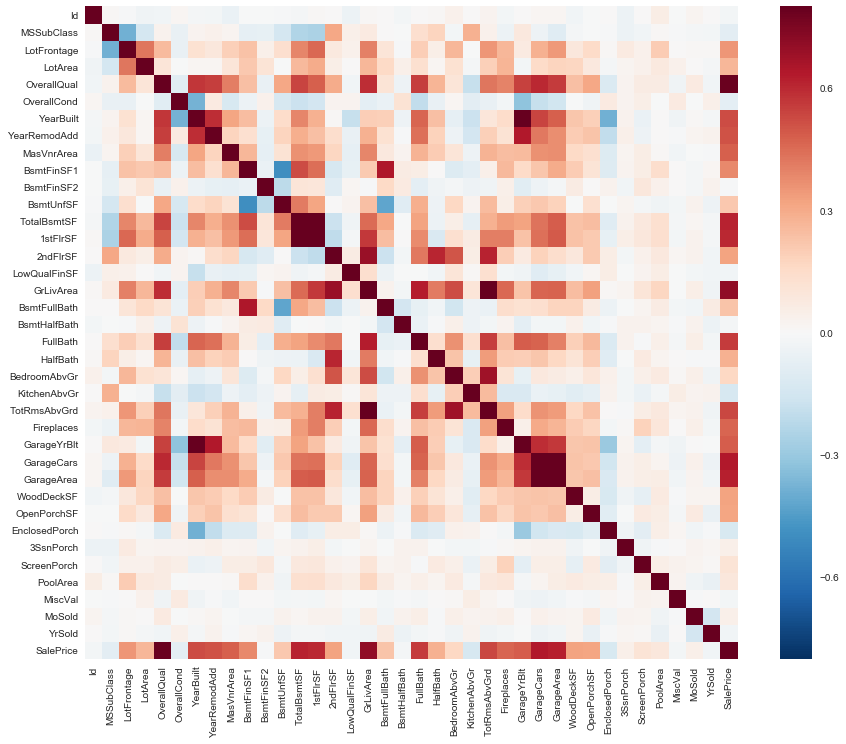

In [37]:
#Correlation MAtrix :)
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [43]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice').SalePrice.index

In [46]:
cm = np.corrcoef(df[cols].values.T)

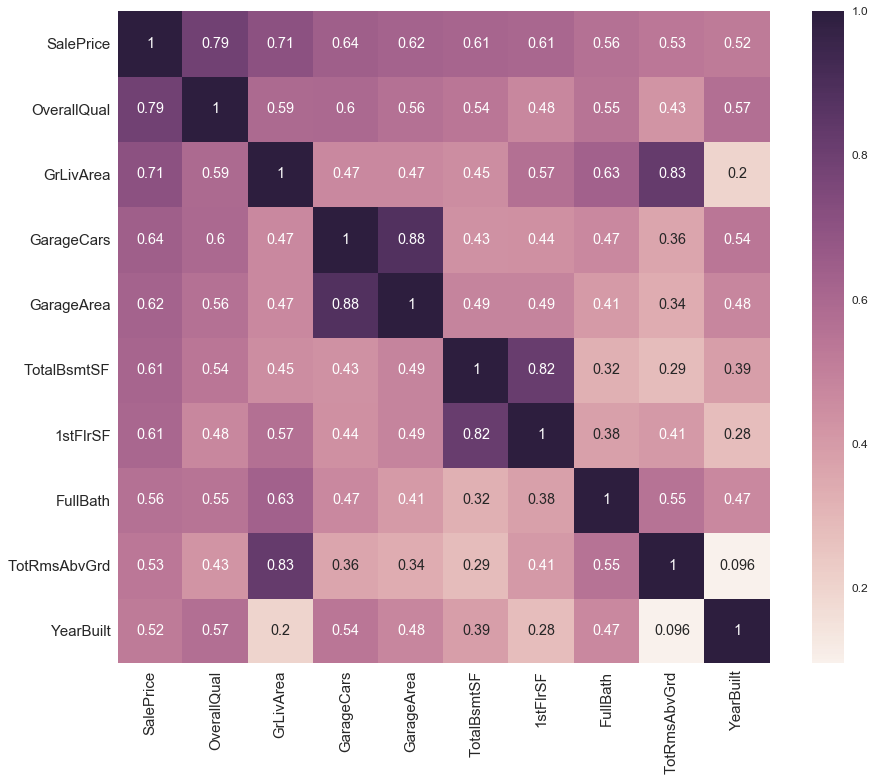

In [58]:
f, ax = plt.subplots(figsize=(15,12))
sns.set(font_scale=1.2)
hm = sns.heatmap(cm,cbar=True, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)

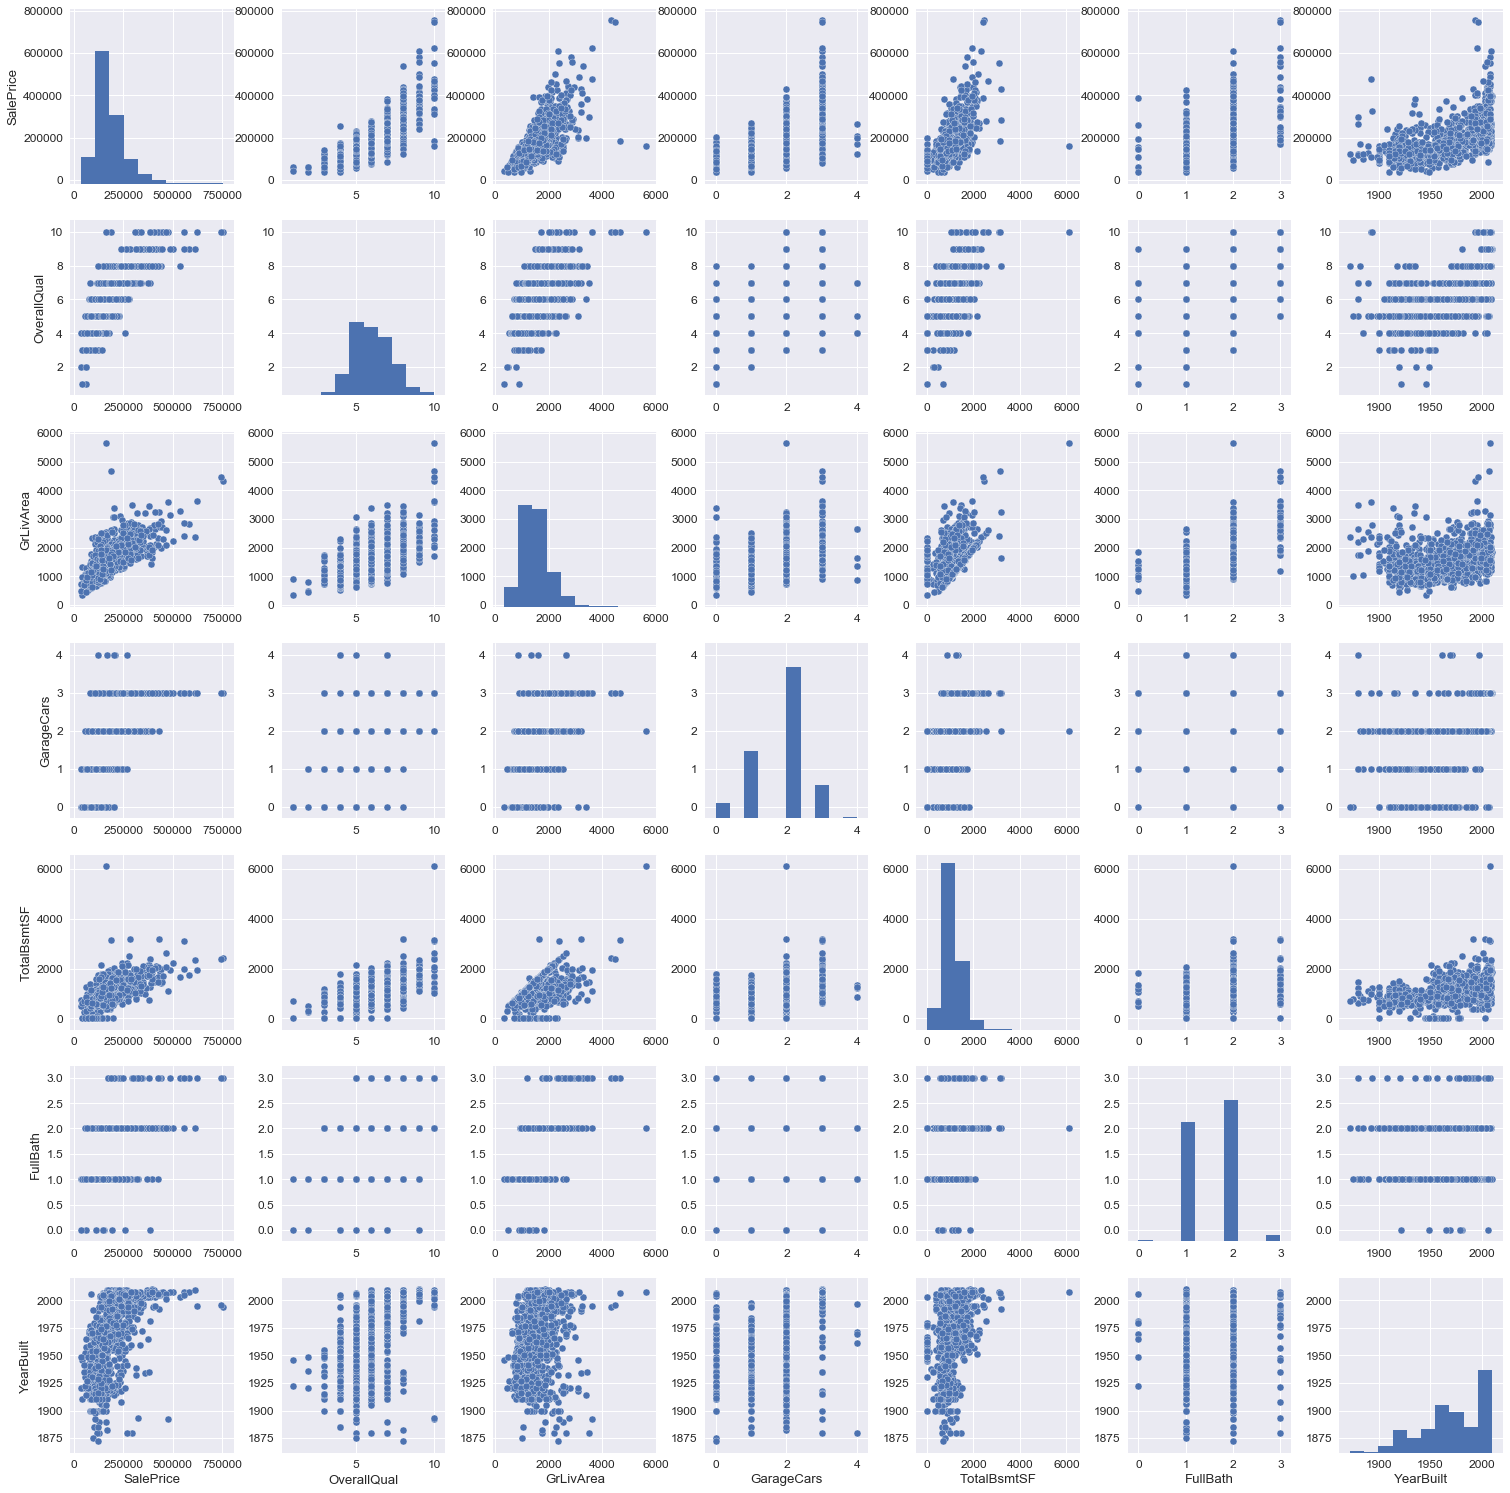

In [61]:
sns.set(font_scale=1.2)
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size=3)

In [65]:
df.shape

(1460, 81)

In [64]:
#Missing Values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [69]:
df = df.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)

In [70]:
df = df.drop(df.loc[df.Electrical.isnull()].index)

In [73]:
df.isnull().values.any()

False

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
#columns_to_check = ['OverallQual','GrLivArea','GarageCars']
columns_to_check = ['GarageCars']
X = df[columns_to_check].values
y = df.SalePrice.values

In [95]:
regr = RandomForestRegressor()
regr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [96]:
df_test = pd.read_csv("train.csv")

In [97]:
X_test = df_test[columns_to_check].values
y_test = df_test.SalePrice
regr.score(X_test, y_test)

0.49099772247918355